In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv("Quarterly_Census_of_Employment_and_Wages__QCEW_.csv")  

In [3]:
# data[ (data["Year"]==2004)  & (data["Area Type"]=="California - Statewide") & (data["Ownership"]=="Private")  & (data["Quarter"]=="Annual") ]

In [4]:
county_data=data[ (data["Area Type"]=="County") & (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
State_data=data[ (data["Area Type"]=="California - Statewide")& (data["Quarter"]=="Annual") & (data["Industry Name"]=="Total, All Industries")]
US_data=data[ (data["Area Type"]=="United States")& (data["Quarter"]=="Annual") & (data["Industry Name"]=="Total, All Industries")]



Text(0.5, 1.0, 'Proportion of different Ownership in California')

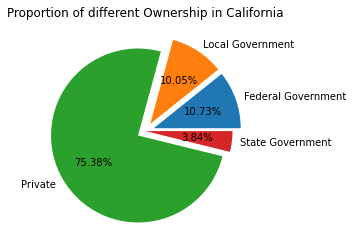

In [5]:
State_data2=data[ (data["Area Type"]=="California - Statewide")& (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
State_data2_ownership_count=State_data2[["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(State_data2_ownership_count["Industry Name"],labels=State_data2_ownership_count.index,autopct="%.2f%%", explode=[0.1,0.1,0.1,0])
plt.title('Proportion of different Ownership in California')


Text(0.5, 1.0, 'Proportion of different Ownership in the United States')

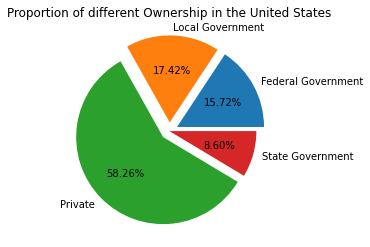

In [6]:
US_data2=data[ (data["Area Type"]=="United States")& (data["Quarter"]=="Annual") & (data["Industry Name"]!="Total, All Industries")]
US_data2_ownership_count=US_data2[["Industry Name", "Ownership"]].groupby(['Ownership']).count()
plt.pie(US_data2_ownership_count["Industry Name"],labels=US_data2_ownership_count.index,autopct="%.2f%%", explode=[0.1,0.1,0.1,0])
plt.title('Proportion of different Ownership in the United States')

In [7]:
county_ownership_employment_data=county_data[["Year", "Ownership", "Average Monthly Employment"]]
county_ownership_employment_average = county_ownership_employment_data.groupby(['Ownership','Year']).mean()

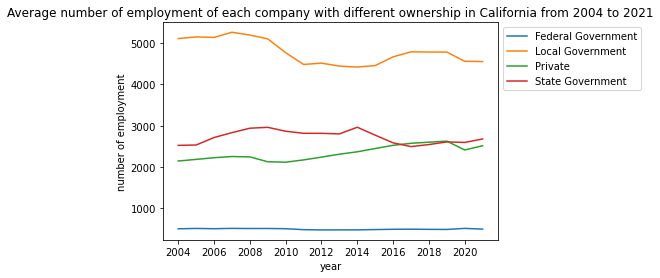

In [9]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=county_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment of each company with different ownership in California from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [10]:
State_ownership_employment_data=State_data[["Year", "Ownership", "Average Monthly Employment"]]
State_ownership_employment_average = State_ownership_employment_data.groupby([ 'Ownership', 'Year']).mean()
State_ownership_employment_total=State_ownership_employment_average.loc["Total Covered",:]
State_ownership_employment_average=State_ownership_employment_average.drop(level='Ownership',index=["Total Covered"])

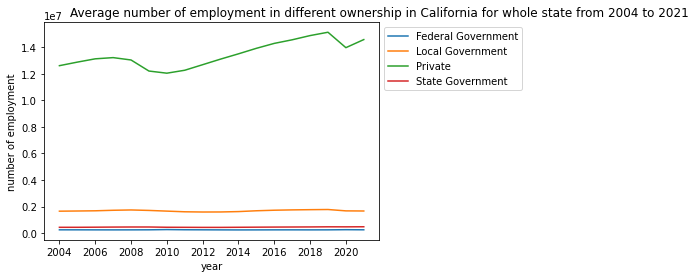

In [11]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=State_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in California for whole state from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

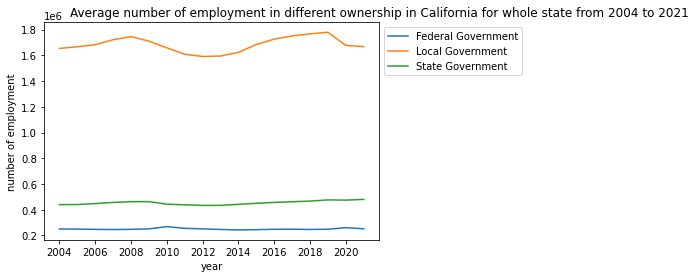

In [12]:
State_ownership_employment_average=State_ownership_employment_average.drop(level='Ownership',index=["Private"])
for Ownership in ['Federal Government','Local Government','State Government']:
    item=State_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in California for whole state from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [13]:
US_ownership_employment_data=US_data[["Year", "Ownership", "Average Monthly Employment"]]
US_ownership_employment_average = US_ownership_employment_data.groupby(['Ownership', 'Year']).mean()
US_ownership_employment_total=US_ownership_employment_average.loc["Total Covered",:]
US_ownership_employment_average=US_ownership_employment_average.drop(level='Ownership',index=["Total Covered"])

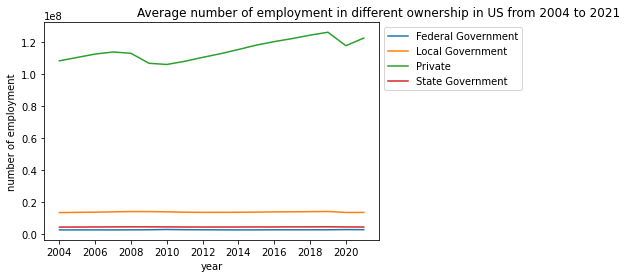

In [14]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=US_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in US from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

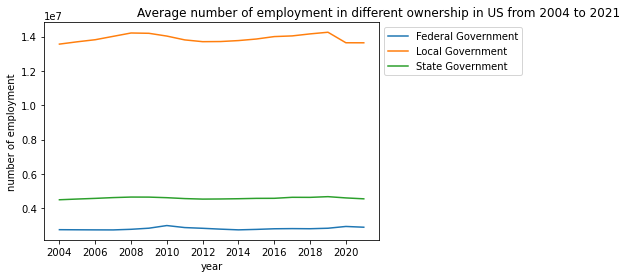

In [15]:
US_ownership_employment_average=US_ownership_employment_average.drop(level='Ownership',index=["Private"])
for Ownership in ['Federal Government','Local Government','State Government']:
    item=US_ownership_employment_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('number of employment')
plt.xlabel('year')
plt.title("Average number of employment in different ownership in US from 2004 to 2021",x=1,y=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

In [16]:
State_ownership_employment_total.mean()/US_ownership_employment_total.mean()

Average Monthly Employment    0.116058
dtype: float64

Text(0.5, 1.0, "California's share of employment of the United State")

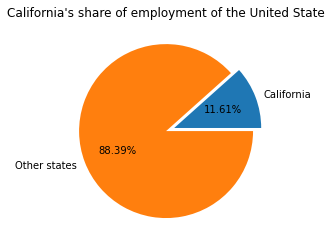

In [17]:
x=[int(State_ownership_employment_total.mean()),int(US_ownership_employment_total.mean()-State_ownership_employment_total.mean())]
plt.pie(x,labels=["California", "Other states"],autopct="%.2f%%", explode=[0.1,0])
plt.title('California\'s share of employment of the United State')

Text(0.5, 0, 'year')

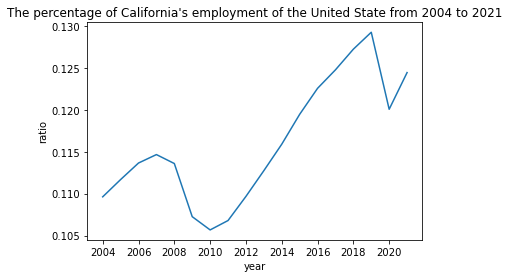

In [18]:
plt.plot(State_ownership_employment_total/US_ownership_employment_total.mean())
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('The percentage of California\'s employment of the United State from 2004 to 2021')
plt.ylabel('ratio')
plt.xlabel('year')

In [19]:
State_ownership_Wages_data=State_data[["Year", "Ownership", "Average Weekly Wages"]]
State_ownership_Wages_average = State_ownership_Wages_data.groupby(['Year', 'Ownership']).mean()
US_ownership_Wages_data=US_data[["Year", "Ownership", "Average Weekly Wages"]]
US_ownership_Wages_average = US_ownership_Wages_data.groupby(['Year', 'Ownership']).mean()

In [20]:
US_ownership_Wages_average

Average Weekly Wages
Year Ownership                               
2004 Federal Government                1111.0
     Local Government                   708.0
     Private                            753.0
     State Government                   791.0
     Total Covered                      757.0
...                                       ...
2021 Private                           1308.0
     State Government                  1324.0
     Total Covered                     1300.0
     Total Government                  1253.0
     Total U.I. Covered                1292.0

[126 rows x 1 columns]

In [21]:
State_ownership_Wages_average=State_ownership_Wages_average.swaplevel(i=1,j=0).sort_index()
US_ownership_Wages_average=US_ownership_Wages_average.swaplevel(i=1,j=0).sort_index()
State_ownership_Wages_total=State_ownership_Wages_average.loc["Total Covered",:]
US_ownership_Wages_total=US_ownership_Wages_average.loc["Total Covered",:]

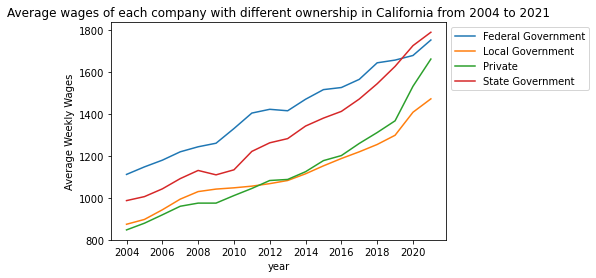

In [22]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=State_ownership_Wages_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.title("Average wages of each company with different ownership in California from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

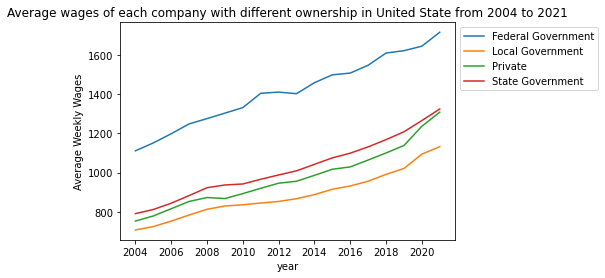

In [23]:
for Ownership in ['Federal Government','Local Government','Private','State Government']:
    item=US_ownership_Wages_average.loc[Ownership,:]
    plt.plot(item, label=Ownership)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.title("Average wages of each company with different ownership in United State from 2004 to 2021")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

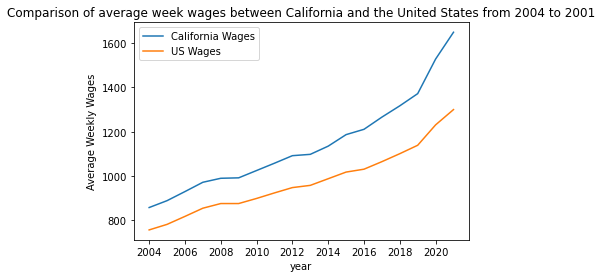

In [24]:
plt.plot(State_ownership_Wages_total, label='California Wages')
plt.plot(US_ownership_Wages_total, label='US Wages')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Comparison of average week wages between California and the United States from 2004 to 2001')
plt.ylabel('Average Weekly Wages')
plt.xlabel('year')
plt.legend()